In [434]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [435]:
ds = ".\\DS\\out\\df_10000.csv" 
df = pd.read_csv(ds)
df = df.drop(df.columns[0] ,axis=1,inplace=False)

In [436]:
df.head(3)

Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                53          23178                  1                       1   
1                53          30492                  1                       1   
2                53            217                  2                       2   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           51                           67   
1                           44                           60   
2                           74                          270   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                     51                     51                    51.0   
1                     44                     44                    44.0   
2                     37                     37                    37.0   

   Fwd Packet Length Std  ...  min_seg_size_forward  Active Mean  Active Std  \
0                    0.0  ...                    20          0.0         0.0   
1                    0.0  ...                    20          0.0         0.0   
2                    0.0  ...                    32          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
0           0           0        0.0       0.0         0         0  BENIGN  
1           0           0        0.0       0.0         0         0  BENIGN  
2           0           0        0.0       0.0         0         0  BENIGN  

[3 rows x 79 columns]

In [437]:
df.shape

(10000, 79)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             10000 non-null  int64  
 1   Flow Duration                10000 non-null  int64  
 2   Total Fwd Packets            10000 non-null  int64  
 3   Total Backward Packets       10000 non-null  int64  
 4   Total Length of Fwd Packets  10000 non-null  int64  
 5   Total Length of Bwd Packets  10000 non-null  int64  
 6   Fwd Packet Length Max        10000 non-null  int64  
 7   Fwd Packet Length Min        10000 non-null  int64  
 8   Fwd Packet Length Mean       10000 non-null  float64
 9   Fwd Packet Length Std        10000 non-null  float64
 10  Bwd Packet Length Max        10000 non-null  int64  
 11  Bwd Packet Length Min        10000 non-null  int64  
 12  Bwd Packet Length Mean       10000 non-null  float64
 13  Bwd Packet Length

In [439]:
df.describe().T

c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count          mean           std  min    25%  \
Destination Port             10000.0  8.031127e+03  1.819490e+04  0.0   53.0   
Flow Duration                10000.0  1.461726e+07  3.336126e+07 -1.0  160.0   
Total Fwd Packets            10000.0  5.665300e+00  1.967285e+01  1.0    2.0   
Total Backward Packets       10000.0  5.391700e+00  2.771449e+01  0.0    1.0   
Total Length of Fwd Packets  10000.0  5.644832e+02  4.730540e+03  0.0   12.0   
...                              ...           ...           ...  ...    ...   
Active Min                   10000.0  5.828091e+04  5.287867e+05  0.0    0.0   
Idle Mean                    10000.0  8.344763e+06  2.367482e+07  0.0    0.0   
Idle Std                     10000.0  4.932296e+05  4.585956e+06  0.0    0.0   
Idle Max                     10000.0  8.719664e+06  2.440912e+07  0.0    0.0   
Idle Min                     10000.0  7.955117e+06  2.341279e+07  0.0    0.0   

                                 50%         75%          max  
Destination Port                80.0      443.00      65524.0  
Flow Duration                31257.5  3242061.25  119997660.0  
Total Fwd Packets                2.0        5.00       1085.0  
Total Backward Packets           2.0        4.00       1632.0  
Total Length of Fwd Packets     62.0      247.00     302489.0  
...                              ...         ...          ...  
Active Min                       0.0        0.00   26400000.0  
Idle Mean                        0.0        0.00  120000000.0  
Idle Std                         0.0        0.00   63300000.0  
Idle Max                         0.0        0.00  120000000.0  
Idle Min                         0.0        0.00  120000000.0  

[78 rows x 8 columns]

In [440]:
# Discarding NA values.
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)
df.shape

(9994, 79)

In [441]:
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

## feature selection phase - find cols with all zero values 

In [442]:
#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = df.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

Bwd PSH Flags  Bwd URG Flags  Fwd Avg Bytes/Bulk  Fwd Avg Packets/Bulk  \
count         9994.0         9994.0              9994.0                9994.0   
mean             0.0            0.0                 0.0                   0.0   
std              0.0            0.0                 0.0                   0.0   
min              0.0            0.0                 0.0                   0.0   
25%              0.0            0.0                 0.0                   0.0   
50%              0.0            0.0                 0.0                   0.0   
75%              0.0            0.0                 0.0                   0.0   
max              0.0            0.0                 0.0                   0.0   

       Fwd Avg Bulk Rate  Bwd Avg Bytes/Bulk  Bwd Avg Packets/Bulk  \
count             9994.0              9994.0                9994.0   
mean                 0.0                 0.0                   0.0   
std                  0.0                 0.0                   0.0   
min                  0.0                 0.0                   0.0   
25%                  0.0                 0.0                   0.0   
50%                  0.0                 0.0                   0.0   
75%                  0.0                 0.0                   0.0   
max                  0.0                 0.0                   0.0   

       Bwd Avg Bulk Rate  
count             9994.0  
mean                 0.0  
std                  0.0  
min                  0.0  
25%                  0.0  
50%                  0.0  
75%                  0.0  
max                  0.0

In [443]:
df.drop(columns=all_zeroes_cols, inplace=True)
df.shape

(9994, 71)

In [444]:
## Creates a  new column to distinguish if is either positive for attack or not. 
is_attack = df.loc[:, "Label"].map(lambda lbl: 0 if lbl == "BENIGN" else 1)
is_attack.name = "is_attack"
df.loc[:, is_attack.name] = is_attack
df.shape

(9994, 72)

In [445]:
class_counts = df['is_attack'].value_counts()
xaxis_labels =["Normal","Attack"]
colors = {'Normal':'green','Attack':'red' }  
legend_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in legend_labels]
ymax = df.shape [0]
count_dict = class_counts.to_dict()
traffic_counts = count_dict.values()
#type(class_counts) # pandas.core.series.Series

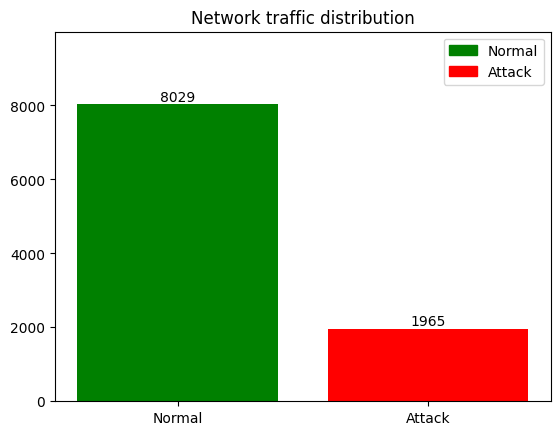

In [446]:
fig, ax = plt.subplots()
bar_container = ax.bar(xaxis_labels, traffic_counts,color =['green','red'])
ax.set(title='Network traffic distribution', ylim=(0, ymax))
ax.bar_label(bar_container, fmt=lambda x: f'{x:.0f}')
ax.legend(handles=handles, labels=legend_labels)

plt.show()

## DOWNSAMPLING

In [447]:
df.loc[:, "is_attack"].value_counts()
rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85) # equals traffic unless ratio is specified
df.drop(["is_attack"], axis=1, inplace=True) # temporarily rm the categorical column for underSampling
all_data_res, trf_type_res = rus.fit_resample(df, is_attack)
#all_datav2 = pd.concat([all_data_res, trf_type_res], join="inner")  # another way to join dataframe w/ series
all_datav2 = all_data_res.join(trf_type_res, how="inner")
all_datav2.shape # check if resulting DaraFrame valid

(4276, 72)

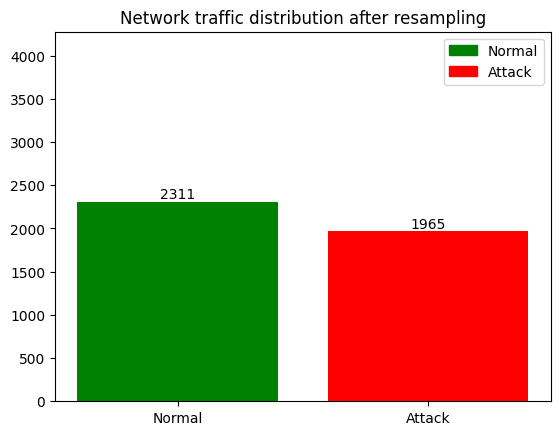

In [448]:
class_counts = all_datav2['is_attack'].value_counts()
xaxis_labels =["Normal","Attack"]
colors = {'Normal':'green','Attack':'red' }  
legend_labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in legend_labels]
ymax = all_datav2.shape [0]
count_dict = class_counts.to_dict()
traffic_counts = count_dict.values()

fig, ax = plt.subplots()
bar_container = ax.bar(xaxis_labels, traffic_counts,color =['green','red'])
ax.set(title='Network traffic distribution after resampling', ylim=(0, ymax))
ax.bar_label(bar_container, fmt=lambda x: f'{x:.0f}')
ax.legend(handles=handles, labels=legend_labels)

plt.show()

In [449]:
all_datav2.dropna()
#all_datav2.info()

Destination Port  Flow Duration  Total Fwd Packets  \
2962                53            178                  2   
738                 53         231194                  4   
5675                53          23699                  2   
5215                80          29317                  1   
8567                80         221531                  2   
...                ...            ...                ...   
9972              1030             49                  1   
9983                80        1091597                  3   
9985                80              3                  2   
9989                80       85573029                  8   
9992                80          13781                  2   

      Total Backward Packets  Total Length of Fwd Packets  \
2962                       2                          130   
738                        2                          120   
5675                       2                           84   
5215                       1                            0   
8567                       0                           12   
...                      ...                          ...   
9972                       1                            2   
9983                       4                           26   
9985                       0                            0   
9989                       7                          371   
9992                       2                           12   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
2962                          386                     65   
738                           154                     30   
5675                          294                     42   
5215                            0                      0   
8567                            0                      6   
...                           ...                    ...   
9972                            6                      2   
9983                        11601                     20   
9985                            0                      0   
9989                        11595                    371   
9992                            0                      6   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
2962                     65               65.000000               0.000000   
738                      30               30.000000               0.000000   
5675                     42               42.000000               0.000000   
5215                      0                0.000000               0.000000   
8567                      6                6.000000               0.000000   
...                     ...                     ...                    ...   
9972                      2                2.000000               0.000000   
9983                      0                8.666667              10.263203   
9985                      0                0.000000               0.000000   
9989                      0               46.375000             131.168308   
9992                      6                6.000000               0.000000   

      ...  Active Mean  Active Std  Active Max  Active Min   Idle Mean  \
2962  ...          0.0         0.0           0           0         0.0   
738   ...          0.0         0.0           0           0         0.0   
5675  ...          0.0         0.0           0           0         0.0   
5215  ...          0.0         0.0           0           0         0.0   
8567  ...          0.0         0.0           0           0         0.0   
...   ...          ...         ...         ...         ...         ...   
9972  ...          0.0         0.0           0           0         0.0   
9983  ...          0.0         0.0           0           0         0.0   
9985  ...          0.0         0.0           0           0         0.0   
9989  ...        996.0         0.0         996         996  85400000.0   
9992  ...          0.0         0.0           0           0         0.0   

     

## CALCULATING FEATURES' IMPORTANCE

In [450]:
## feature selection phase - prepare data for RFC
#lbls = all_datav2.loc[:, "Label"]
data_w_o_cat_attrs = all_datav2.iloc[:, :-2]
#lbls
data_w_o_cat_attrs

Destination Port  Flow Duration  Total Fwd Packets  \
2962                53            178                  2   
738                 53         231194                  4   
5675                53          23699                  2   
5215                80          29317                  1   
8567                80         221531                  2   
...                ...            ...                ...   
9972              1030             49                  1   
9983                80        1091597                  3   
9985                80              3                  2   
9989                80       85573029                  8   
9992                80          13781                  2   

      Total Backward Packets  Total Length of Fwd Packets  \
2962                       2                          130   
738                        2                          120   
5675                       2                           84   
5215                       1                            0   
8567                       0                           12   
...                      ...                          ...   
9972                       1                            2   
9983                       4                           26   
9985                       0                            0   
9989                       7                          371   
9992                       2                           12   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
2962                          386                     65   
738                           154                     30   
5675                          294                     42   
5215                            0                      0   
8567                            0                      6   
...                           ...                    ...   
9972                            6                      2   
9983                        11601                     20   
9985                            0                      0   
9989                        11595                    371   
9992                            0                      6   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
2962                     65               65.000000               0.000000   
738                      30               30.000000               0.000000   
5675                     42               42.000000               0.000000   
5215                      0                0.000000               0.000000   
8567                      6                6.000000               0.000000   
...                     ...                     ...                    ...   
9972                      2                2.000000               0.000000   
9983                      0                8.666667              10.263203   
9985                      0                0.000000               0.000000   
9989                      0               46.375000             131.168308   
9992                      6                6.000000               0.000000   

      ...  act_data_pkt_fwd  min_seg_size_forward  Active Mean  Active Std  \
2962  ...                 1                    20          0.0         0.0   
738   ...                 3                    32          0.0         0.0   
5675  ...                 1                    20          0.0         0.0   
5215  ...                 0                    32          0.0         0.0   
8567  ...                 1                    20          0.0         0.0   
...   ...               ...                   ...          ...         ...   
9972  ...                 0                    24          0.0         0.0   
9983  ...                 2                    20          0.0         0.0   
9985  ...                 0                    32          0.0         0.0   
9989  ...                 1                    32        996.0         0.0   
9992  ...                 1         

In [451]:
lbls = all_datav2.loc[:, "is_attack"]

In [452]:
rfc = RandomForestClassifier(random_state=10, n_jobs=1) # 100 trees in forest

# fit random forest classifier on the dataset
rfc.fit(data_w_o_cat_attrs, lbls)

RandomForestClassifier(n_jobs=1, random_state=10)

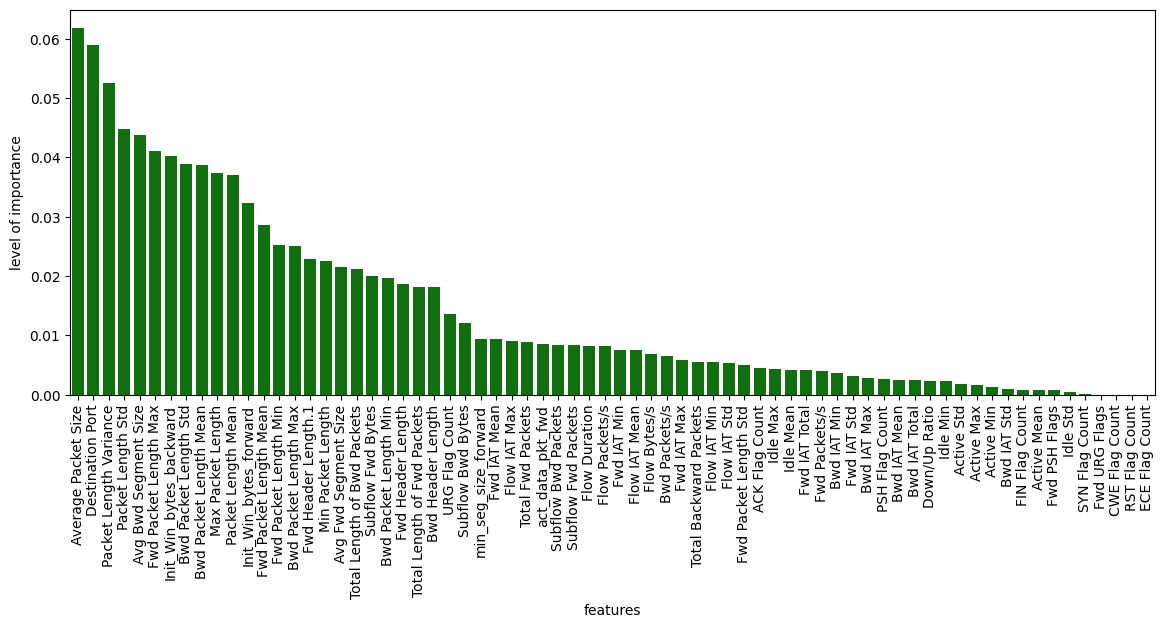

In [453]:
score = np.round(rfc.feature_importances_,5)
importances = pd.DataFrame({'features':data_w_o_cat_attrs.columns,'level of importance':score})
importances = importances.sort_values('level of importance',ascending=False).set_index('features')
# plot importances
sns.barplot(x=importances.index, y="level of importance", data=importances, color="green")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(14,5)
#plt.savefig("importances.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [454]:
threshold = 0.001 # importance threshold
bl_thresh = importances.loc[importances["level of importance"] < threshold]
print("there are {} features to delete, as they are below chosen threshold".format(bl_thresh.shape[0]))
print("these features are the following:")
feats_to_del = [feat for feat in bl_thresh.index]
print("\n".join(feats_to_del))

there are 10 features to delete, as they are below chosen threshold
these features are the following:
Bwd IAT Std
FIN Flag Count
Active Mean
Fwd PSH Flags
Idle Std
SYN Flag Count
Fwd URG Flags
CWE Flag Count
RST Flag Count
ECE Flag Count


In [455]:
## removing these not important features 
all_datav2.drop(columns=feats_to_del, inplace=True) 

In [456]:
all_datav2.head(3)

Destination Port  Flow Duration  Total Fwd Packets  \
2962                53            178                  2   
738                 53         231194                  4   
5675                53          23699                  2   

      Total Backward Packets  Total Length of Fwd Packets  \
2962                       2                          130   
738                        2                          120   
5675                       2                           84   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
2962                          386                     65   
738                           154                     30   
5675                          294                     42   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
2962                     65                    65.0                    0.0   
738                      30                    30.0                    0.0   
5675                     42                    42.0                    0.0   

      ...  act_data_pkt_fwd  min_seg_size_forward  Active Std  Active Max  \
2962  ...                 1                    20         0.0           0   
738   ...                 3                    32         0.0           0   
5675  ...                 1                    20         0.0           0   

      Active Min  Idle Mean  Idle Max  Idle Min   Label  is_attack  
2962           0        0.0         0         0  BENIGN          0  
738            0        0.0         0         0  BENIGN          0  
5675           0        0.0         0         0  BENIGN          0  

[3 rows x 62 columns]

DETECTING HIGHLY CORRELATED FEATURES

In [457]:
all_datav2 = all_datav2.drop(columns =["Label"]).copy()
#all_datav2
all_datav2.head(3)

Destination Port  Flow Duration  Total Fwd Packets  \
2962                53            178                  2   
738                 53         231194                  4   
5675                53          23699                  2   

      Total Backward Packets  Total Length of Fwd Packets  \
2962                       2                          130   
738                        2                          120   
5675                       2                           84   

      Total Length of Bwd Packets  Fwd Packet Length Max  \
2962                          386                     65   
738                           154                     30   
5675                          294                     42   

      Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
2962                     65                    65.0                    0.0   
738                      30                    30.0                    0.0   
5675                     42                    42.0                    0.0   

      ...  Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
2962  ...                       -1                 1                    20   
738   ...                       -1                 3                    32   
5675  ...                       -1                 1                    20   

      Active Std  Active Max  Active Min  Idle Mean  Idle Max  Idle Min  \
2962         0.0           0           0        0.0         0         0   
738          0.0           0           0        0.0         0         0   
5675         0.0           0           0        0.0         0         0   

      is_attack  
2962          0  
738           0  
5675          0  

[3 rows x 61 columns]

In [458]:
all_data_corr_mtrx = all_datav2.corr()

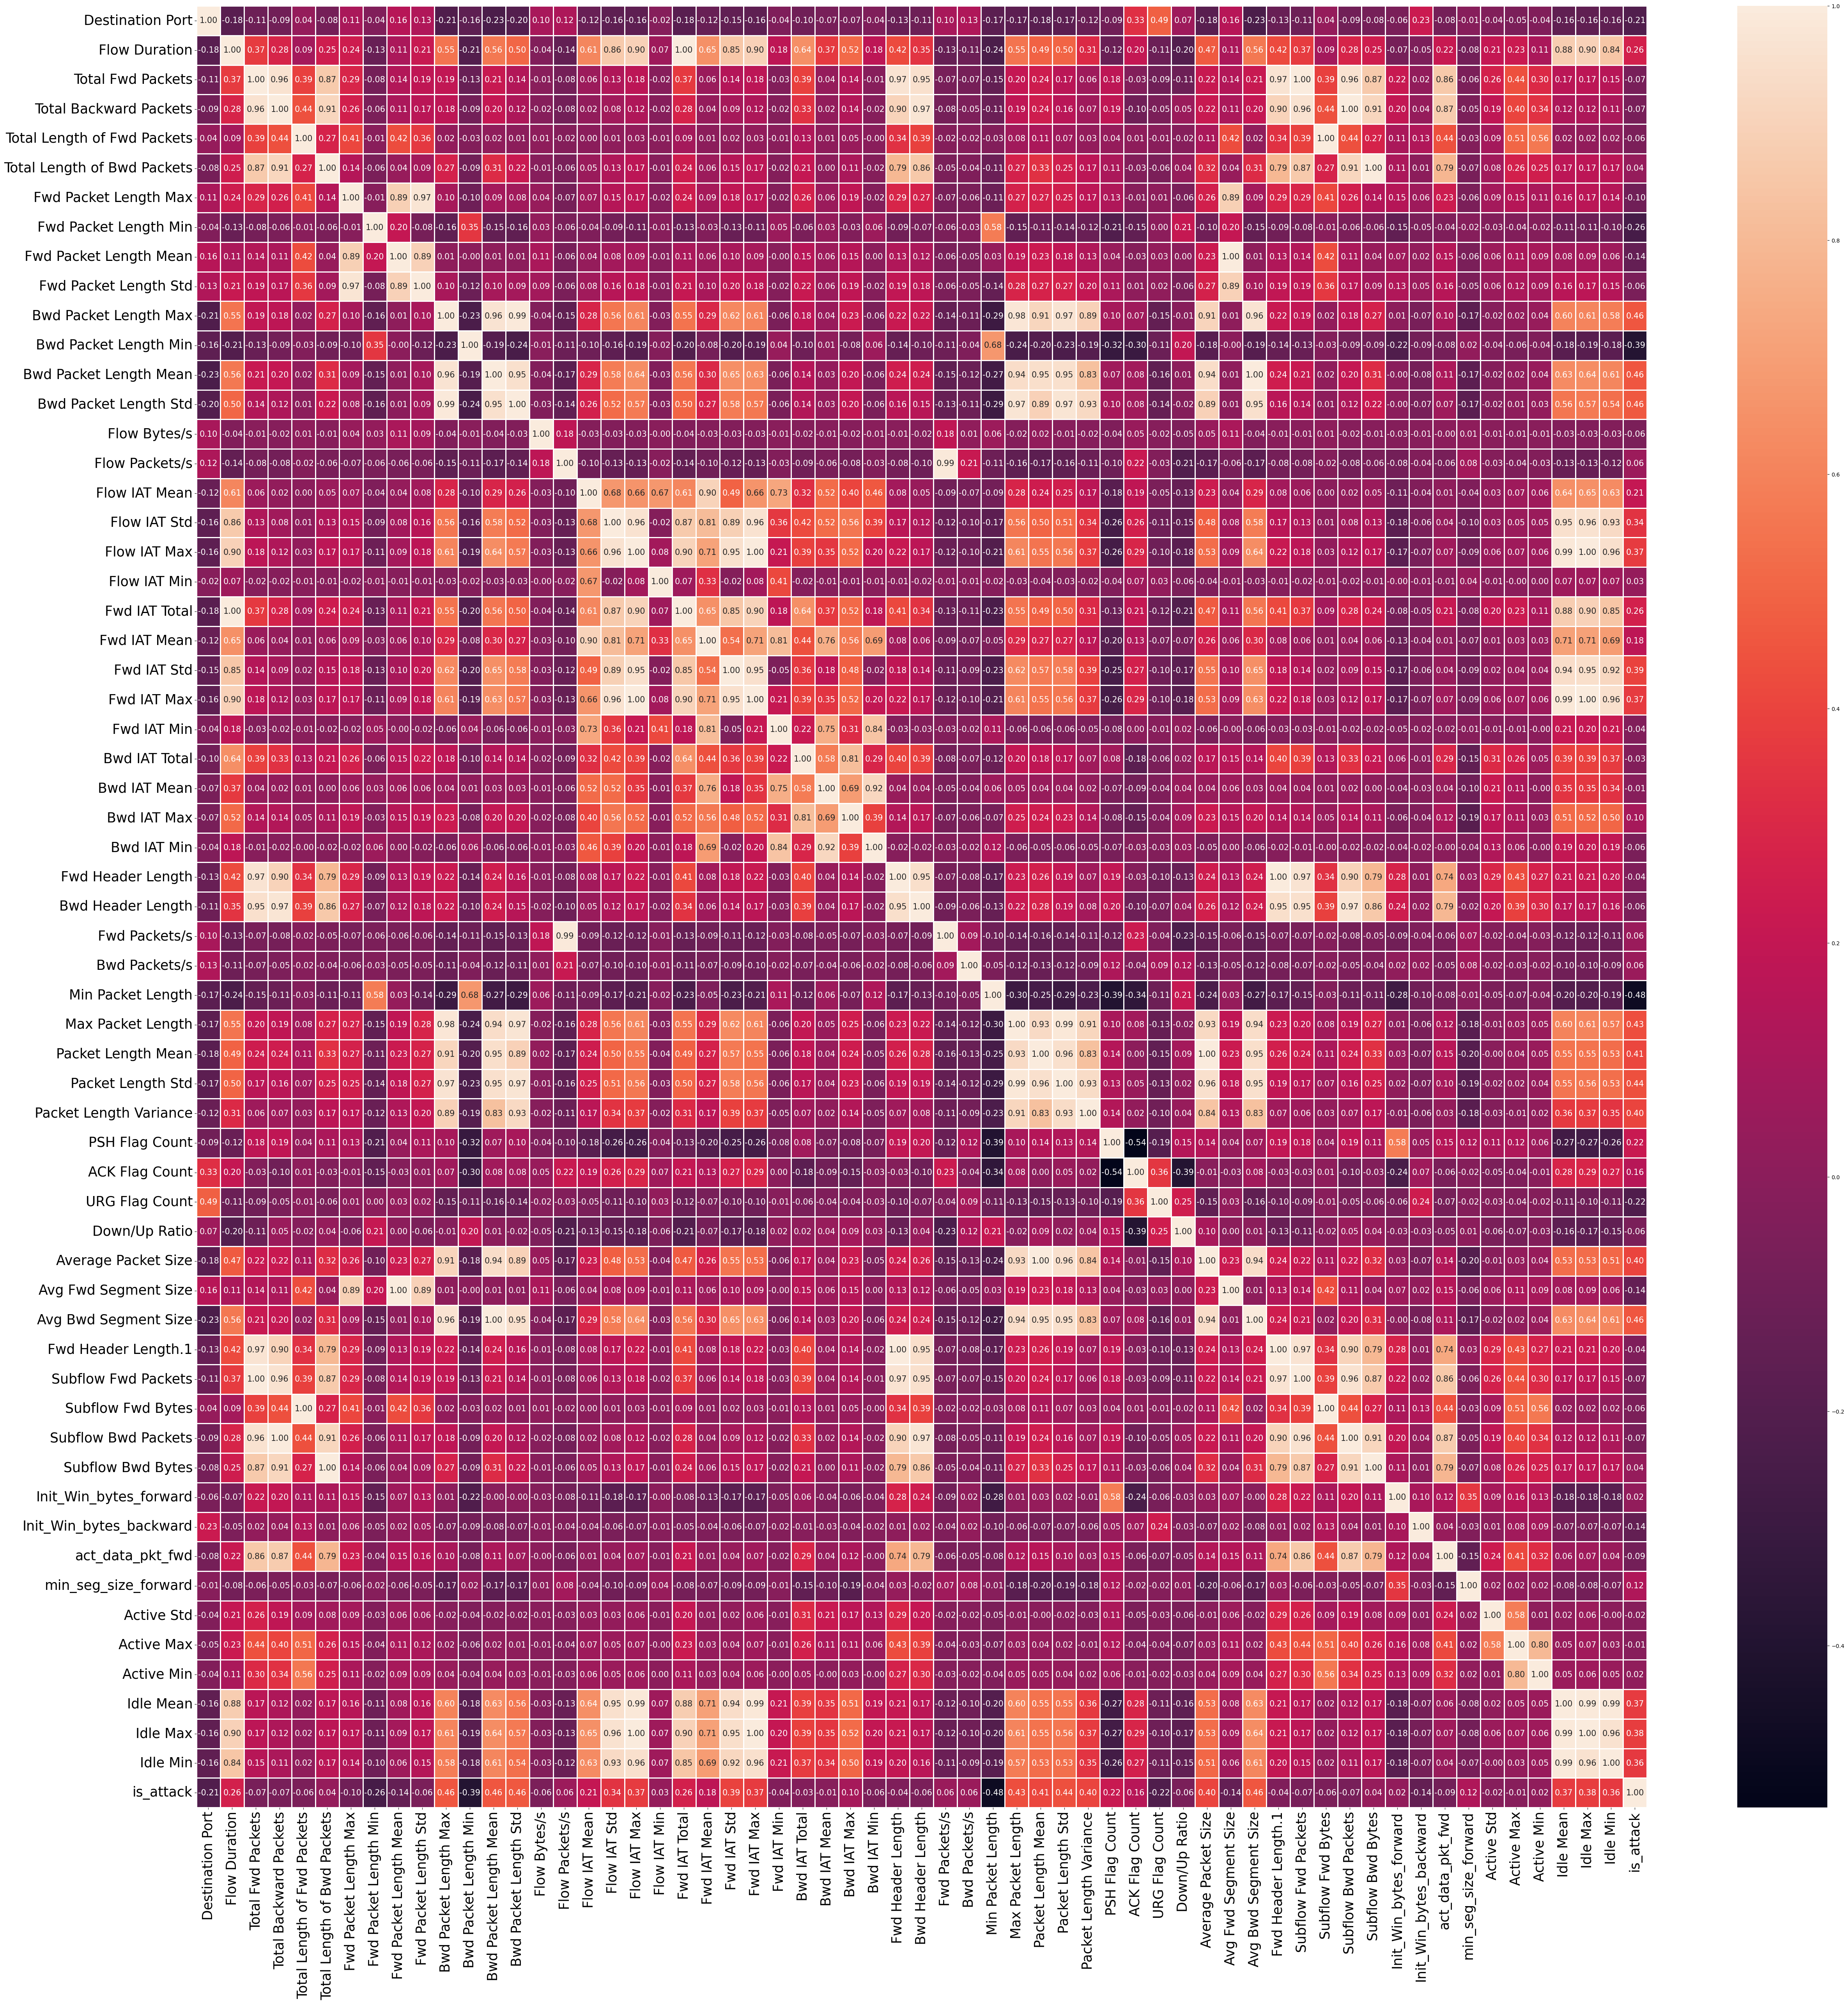

In [459]:
## plotting a correlation heatmap 

plt.gcf().set_size_inches(60, 60)
hm = sns.heatmap(all_data_corr_mtrx, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25)
#plt.savefig("corr_heatmap.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [460]:
## process correlation matrix, list highly correlated feature pairs 
def srt_corr(mtrx):
    corr_ustack = mtrx.unstack().abs()
    #corr_ustack
    corr_srted = corr_ustack.sort_values(ascending=False)
    return corr_srted

srt_corr(all_data_corr_mtrx)

is_attack         is_attack           1.000000
Destination Port  Destination Port    1.000000
Idle Min          Idle Min            1.000000
Idle Max          Idle Max            1.000000
Idle Mean         Idle Mean           1.000000
                                        ...   
ACK Flag Count    Fwd IAT Min         0.000723
Active Std        Idle Min            0.000665
Idle Min          Active Std          0.000665
Bwd IAT Min       act_data_pkt_fwd    0.000057
act_data_pkt_fwd  Bwd IAT Min         0.000057
Length: 3721, dtype: float64

In [461]:
thres_corr = 0.95
epoch=0
highly_corr = {"dummy": "dummy"}
feats_deled = []

all_data_corr_mtrx2 = all_data_corr_mtrx.copy()  # for easy
def add_to_dct(l, ft, ft2):
    try:
        l[ft].append(ft2)
    except KeyError:
        l[ft] = [ft2]

get_imp = lambda feat: importances.loc[feat][0]
srt_key = lambda elem: get_imp(elem[0])  # gets imp of first elem

def what_to_del(dct_srt):    
    to_del = []  #least imp feature
    for k, val in dct_srt.items():
        ## get all indexes lower than current k
        feats_lw_imp = importances[importances.index.slice_indexer(k)].index
        if set(val) - set(feats_lw_imp):  # feat k creates a corr pair w/ feature of higher importance --- delete feat k
            if k not in to_del: to_del.append(k)
        else:  # feat k creates a corr pair w/ features of lower importnace --- delete one w/ lowest imp 
            for ft in feats_lw_imp[::-1]:  # searching from least important
                if ft in val and ft not in to_del:
                    to_del.append(ft)
                    break  ## deleting first founud feat of lowest possible importance
    return to_del
        
            
while highly_corr:
    count = 0
    highly_corr.clear()
    for feats, val in srt_corr(all_data_corr_mtrx2).items():
        if val > thres_corr and feats[0] != feats[1]:
            count += 1
            add_to_dct(highly_corr, feats[0], feats[1])
    if not highly_corr: break  # no more highly corr pairs
    highly_corr_srt = OrderedDict(sorted(highly_corr.items(), key=srt_key))  # sorted based on imp

    to_del = what_to_del(highly_corr_srt)
    feats_deled += to_del
    epoch +=1 # first epoch will be 1 not 0! 
    print("there are {} higly correlated pairs in {} iteration".format(count, epoch))
    all_data_corr_mtrx2.drop(to_del, axis=1, inplace=True)
    all_data_corr_mtrx2.drop(to_del, axis=0, inplace=True)  # need to remove the feat from both cols and index

print("deleting: {} feature".format(len(feats_deled)))
print("finally deleted:\n"+ "\n".join(feats_deled))

there are 108 higly correlated pairs in 1 iteration
deleting: 24 feature
finally deleted:
Idle Min
Fwd IAT Std
Fwd Packets/s
Fwd IAT Total
Idle Mean
Idle Max
Fwd Packet Length Std
Flow IAT Std
Total Backward Packets
Fwd IAT Max
Subflow Fwd Packets
Subflow Bwd Packets
Total Fwd Packets
Subflow Bwd Bytes
Total Length of Fwd Packets
Fwd Header Length
Avg Fwd Segment Size
Bwd Packet Length Max
Packet Length Mean
Max Packet Length
Bwd Packet Length Mean
Bwd Packet Length Std
Avg Bwd Segment Size
Packet Length Std


C:\Users\Eddixon\AppData\Local\Temp\ipykernel_37992\3062147905.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  get_imp = lambda feat: importances.loc[feat][0]


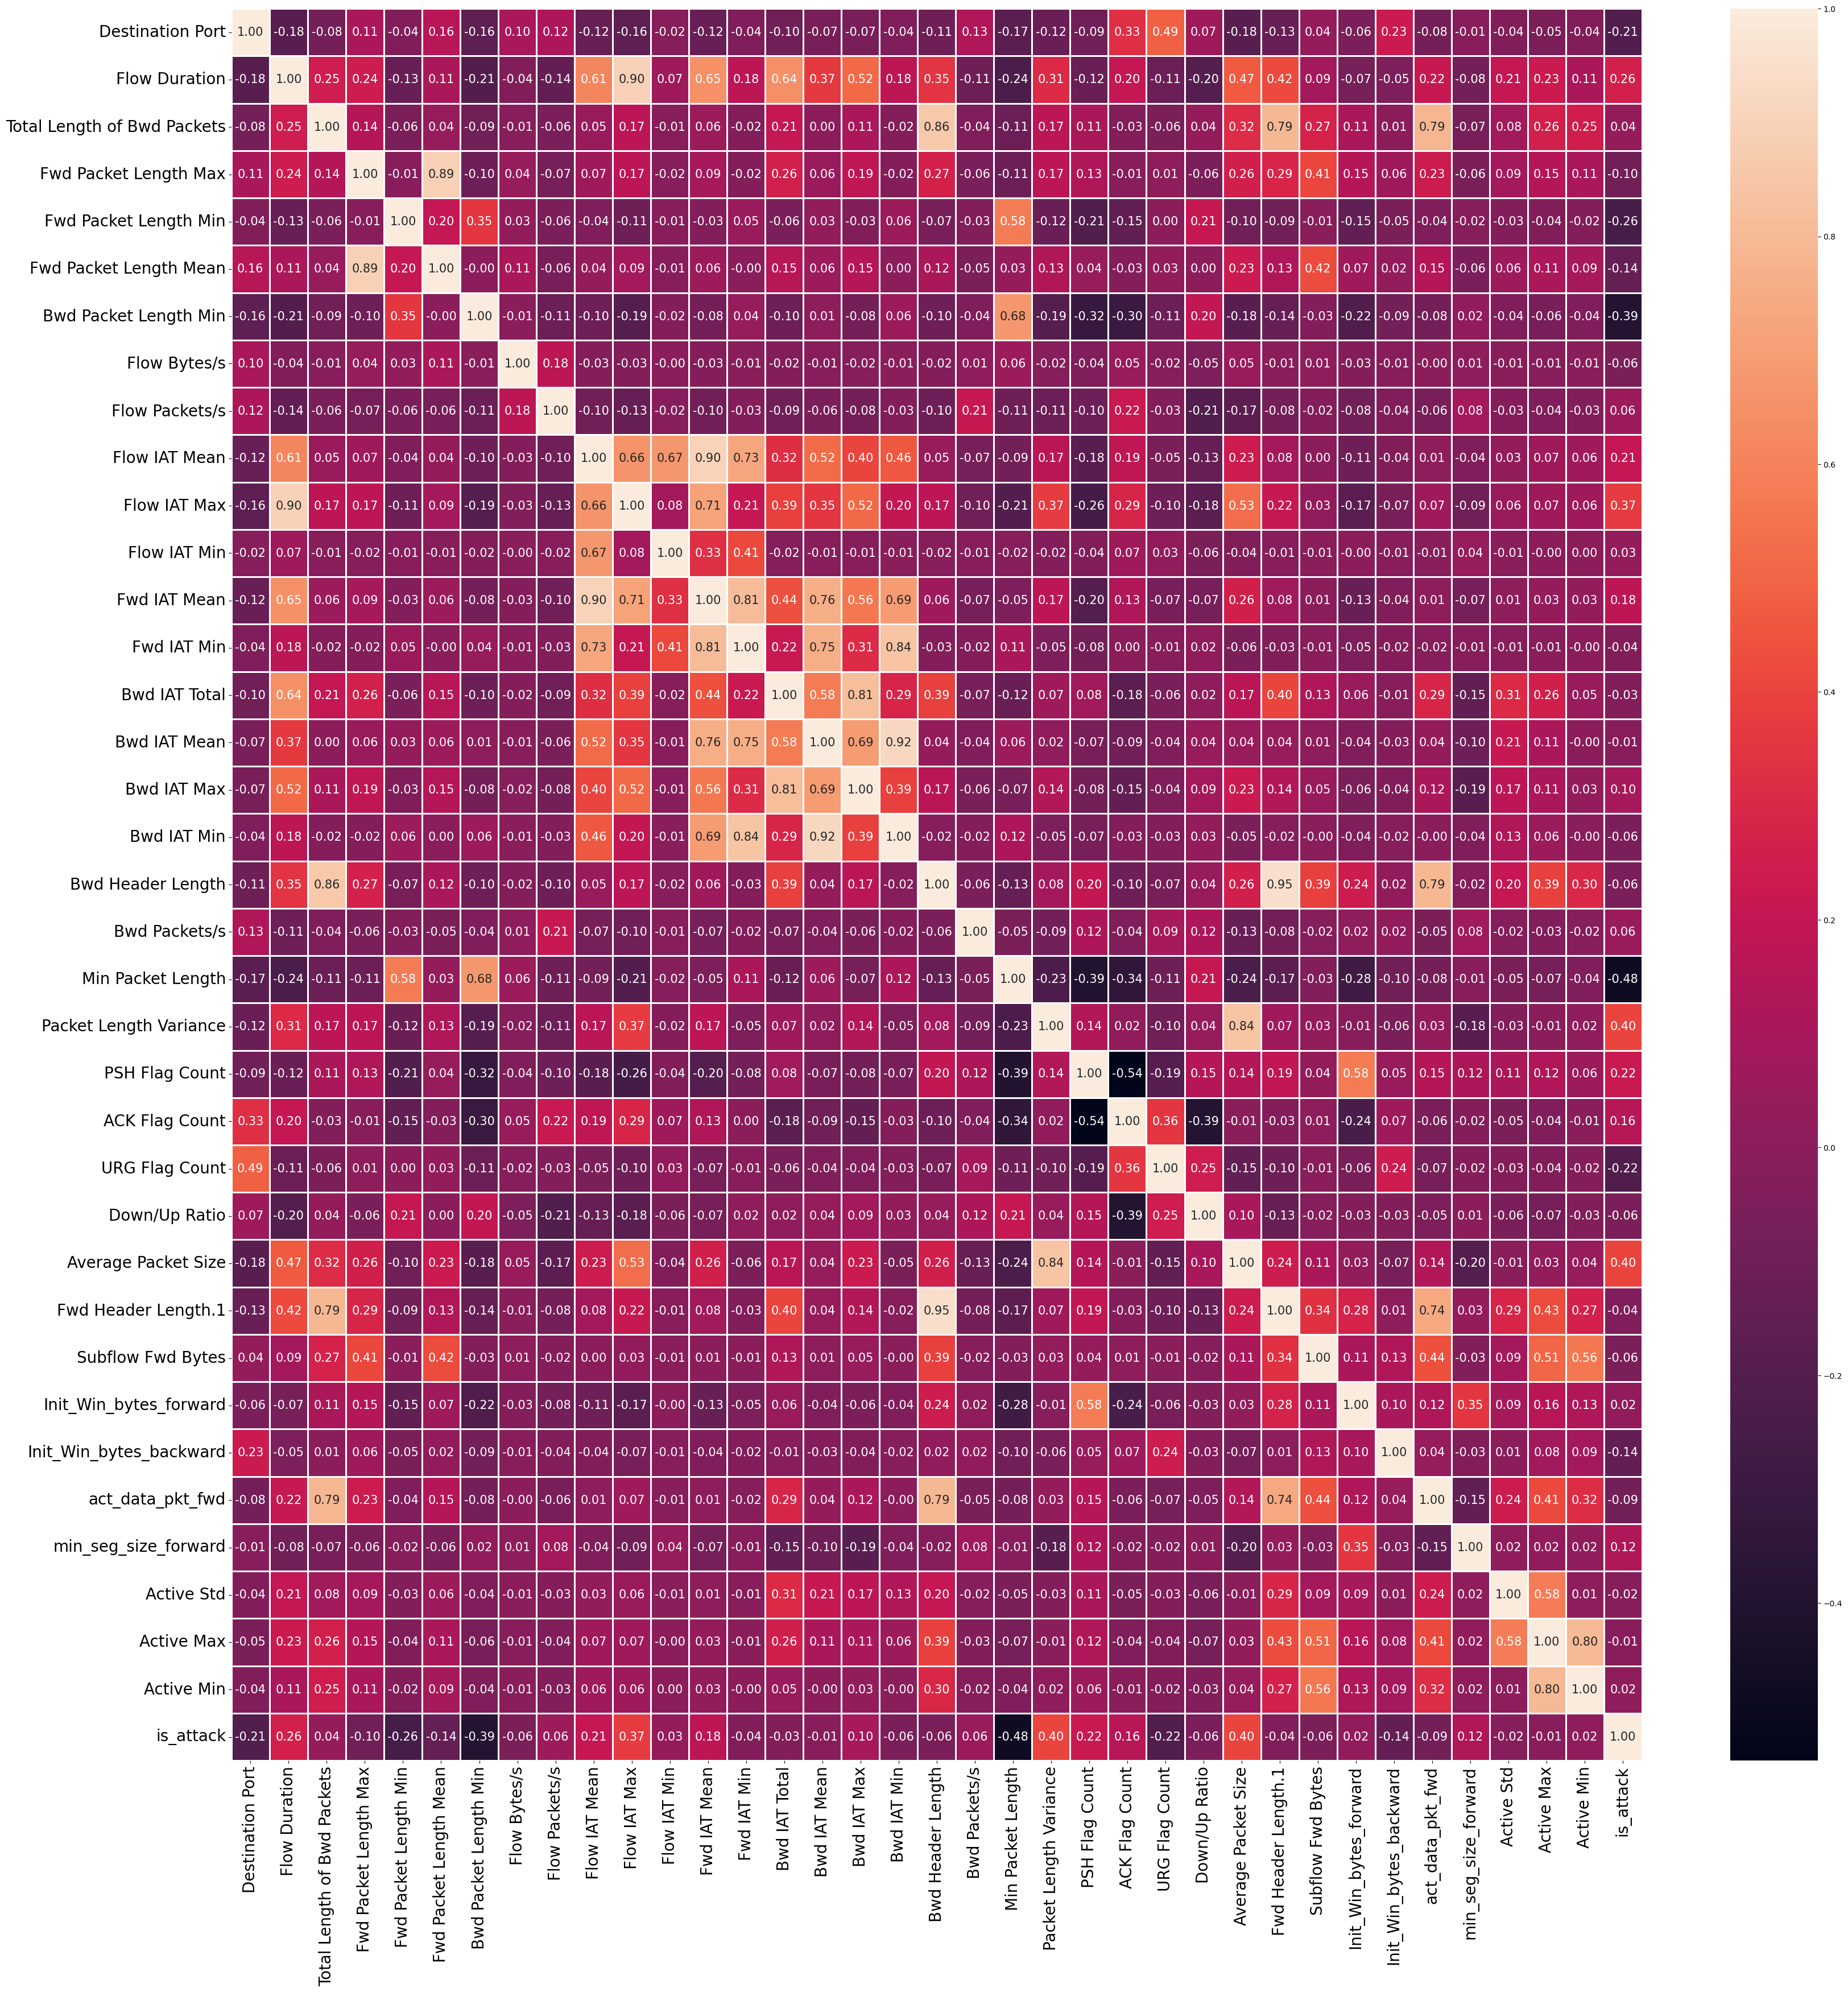

In [462]:
plt.gcf().set_size_inches(40, 40)
hm2 = sns.heatmap(all_data_corr_mtrx2, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm2.set_yticklabels(hm2.get_ymajorticklabels(), fontsize = 20)
hm2.set_xticklabels(hm2.get_xmajorticklabels(), fontsize = 20)
#plt.savefig("corr_heatmap2.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [463]:
all_datav3 = all_datav2.copy() ## just for ease of cells executing 
all_datav3.drop(feats_deled, axis=1, inplace=True)
all_datav3_cp = all_datav3.copy()
all_datav3 # just check

Destination Port  Flow Duration  Total Length of Bwd Packets  \
2962                53            178                          386   
738                 53         231194                          154   
5675                53          23699                          294   
5215                80          29317                            0   
8567                80         221531                            0   
...                ...            ...                          ...   
9972              1030             49                            6   
9983                80        1091597                        11601   
9985                80              3                            0   
9989                80       85573029                        11595   
9992                80          13781                            0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
2962                     65                     65               65.000000   
738                      30                     30               30.000000   
5675                     42                     42               42.000000   
5215                      0                      0                0.000000   
8567                      6                      6                6.000000   
...                     ...                    ...                     ...   
9972                      2                      2                2.000000   
9983                     20                      0                8.666667   
9985                      0                      0                0.000000   
9989                    371                      0               46.375000   
9992                      6                      6                6.000000   

      Bwd Packet Length Min  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  ...  \
2962                    193  2.898876e+06    22471.910110   5.933333e+01  ...   
738                      77  1.185152e+03       25.952231   4.623880e+04  ...   
5675                    147  1.595004e+04      168.783493   7.899667e+03  ...   
5215                      0  0.000000e+00       68.219804   2.931700e+04  ...   
8567                      0  5.416849e+01        9.028082   2.215310e+05  ...   
...                     ...           ...             ...            ...  ...   
9972                      6  1.632653e+05    40816.326530   4.900000e+01  ...   
9983                      0  1.065137e+04        6.412623   1.819328e+05  ...   
9985                      0  0.000000e+00   666666.666700   3.000000e+00  ...   
9989                      0  1.398338e+02        0.175289   6.112359e+06  ...   
9992                      0  8.707641e+02      290.254699   4.593667e+03  ...   

      Fwd Header Length.1  Subflow Fwd Bytes  Init_Win_bytes_forward  \
2962                   40                130                      -1   
738                   128                120                      -1   
5675                   40                 84                      -1   
5215                   32                  0                     293   
8567                   40                 12                     256   
...                   ...                ...                     ...   
9972                   24                  2                    1024   
9983                   72                 26                    8192   
9985                   64                  0                     274   
9989                  264                371                     251   
9992                   40                 12                       0   

      Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
2962                       -1                 1                    20   
738                        -1                 3                    32   
5675                       -1                 1                    20   
5215                       34                 0                    32   
8567                     